# Amazon Bestselling Books Analysis and Visualization

### Author: Bryson Byrd
### Last edited: November 19, 2022


#### Source: https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
#import the data
data = pd.read_csv('bestsellers with categories.csv')

In [3]:
#print the first 10 listed books
data.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [4]:
#sort the list by year
data.sort_values(['Year'], ascending = True)

,Name,Author,User Rating,Reviews,Price,Year,Genre
177,"I, Alex Cross",James Patterson,4.6,1320,7,2009,Fiction
131,Glenn Beck's Common Sense: The Case Against an...,Glenn Beck,4.6,1365,11,2009,Non Fiction
417,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
...,...,...,...,...,...,...,...
150,Guts,Raina Telgemeier,4.8,5476,7,2019,Non Fiction
466,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,26490,15,2019,Non Fiction
462,The Silent Patient,Alex Michaelides,4.5,27536,14,2019,Fiction
130,"Girl, Wash Your Face: Stop Believing the Lies ...",Rachel Hollis,4.6,22288,12,2019,Non Fiction


Text(0.5, 1.0, 'Amazon Best Sellers by Genre')

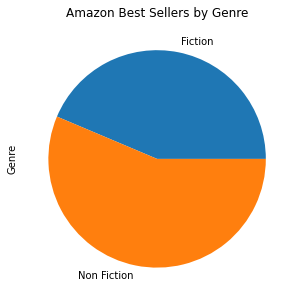

In [5]:
#plot the gerne split
Genre = data.groupby('Genre')['Genre'].count()

Genre.plot.pie(figsize = (5,5))
plt.title('Amazon Best Sellers by Genre')

Text(0, 0.5, 'Price ($USD)')

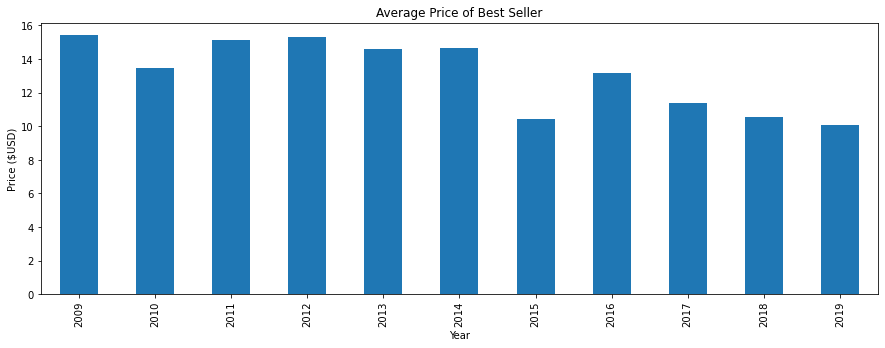

In [50]:
#look at the price data for the best sellers
price = pd.DataFrame()
price['Average'] = data.groupby('Year').Price.mean()

price.Average.plot(kind = 'bar',figsize = (15,5))
plt.title('Average Price of Best Seller')
plt.ylabel('Price ($USD)')

Text(0.5, 1.0, 'Top 10 Best Selling Authors')

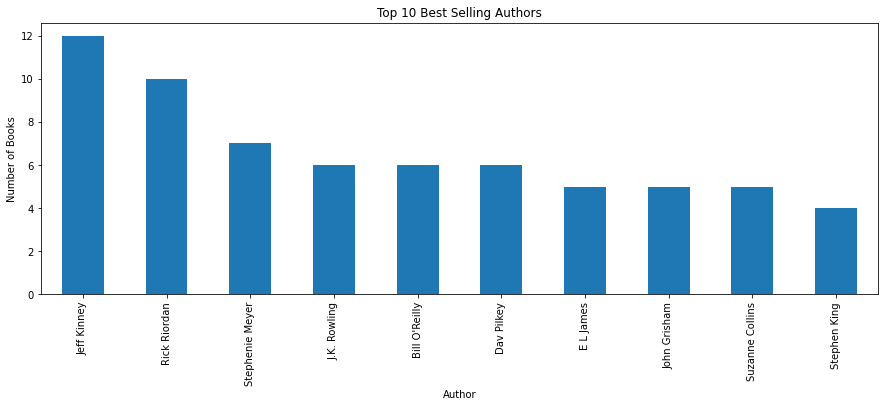

In [49]:
#Top ten best selling artist by how many books on list
num_uniquebooks = data.groupby('Author').Name.nunique().sort_values(ascending= False)

num_uniquebooks.head(10).plot(kind = 'bar', figsize = (15,5))
plt.ylabel('Number of Books')
plt.title('Top 10 Best Selling Authors')

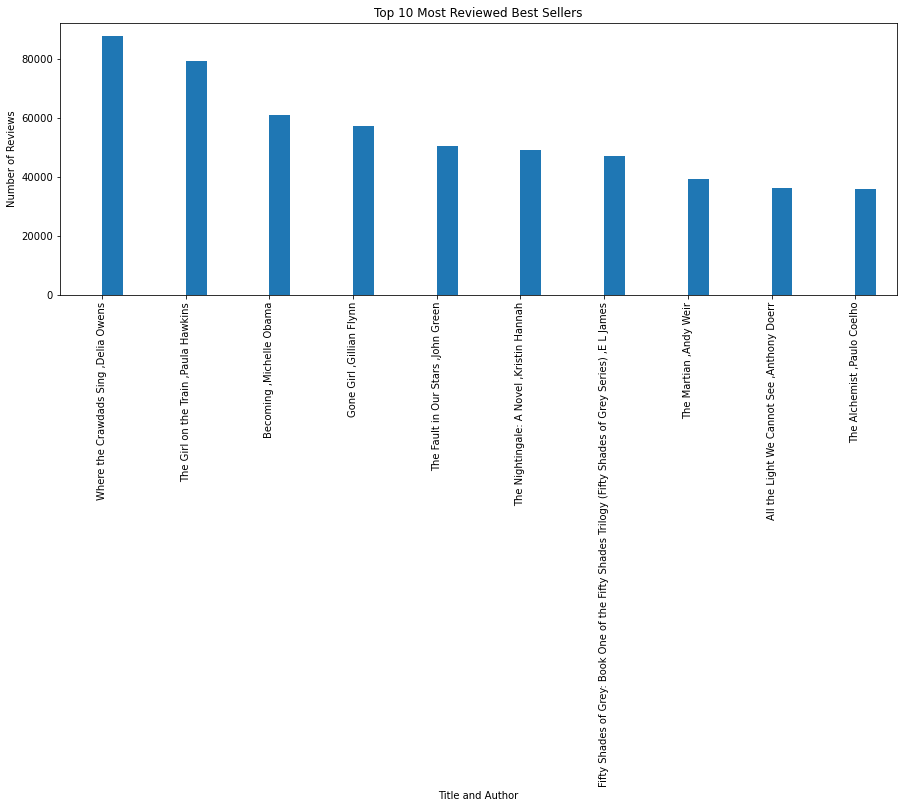

In [55]:
#some books are counted multiple times (best sellers for multiple years)
#some data cleaning to only show unique books
reviews = pd.DataFrame(columns =['Name','Author','User Rating','Reviews'], data = data[['Name','Author','User Rating','Reviews']].values)
reviews.reset_index()
reviews = reviews.drop_duplicates()
reviews = reviews.sort_values('Reviews', ascending = False)

name = list(reviews.Name)
author = list(reviews.Author)

#create labels that include title and author of best seller
label = [x +' ,'+ y for x,y in zip(name,author)]
label = label[:10]

#plot the data
fig = reviews.head(10).plot(kind = 'bar', figsize = (15,5), color = '#1f77b4')
fig.set_xticklabels(label)
plt.title('Top 10 Most Reviewed Best Sellers')
plt.ylabel('Number of Reviews')
plt.xlabel('Title and Author')
plt.legend().set_visible(False)

### Popularity: 

A metric calculated from the amount of reviews for a book on the list and the average 'User Rating' that that book receives. To make the metric more 'fair' (less weighted toward the sheer amount of reviews given), we want to normalize the 'Reviews' count.
We will use the proprocessing library from Sklearn to accomplish this.

In [43]:
normreviews = reviews.loc[:,['User Rating','Reviews']]
scaler = preprocessing.MinMaxScaler()
names = ['Norm User Rating', 'Norm Reviews']
d = scaler.fit_transform(normreviews)
scaled_reviews = pd.DataFrame(d, columns=names)
scaled_reviews.head()

,Norm User Rating,Norm Reviews
0,0.9375,1.000000
1,0.5000,0.904389
2,0.9375,0.695823
3,0.8750,0.574518
4,0.9375,0.560920


In [27]:
#We have to reset the index of each dataframe so element-wise multiplication doesn't result in NaN values.
reviews.reset_index(drop=True, inplace=True)
scaled_reviews.reset_index(drop=True, inplace=True)

In [42]:
#Popularity calculation
reviews['Popularity'] = scaled_reviews['Norm Reviews'] *reviews['User Rating'] 
reviews = reviews.sort_values('Popularity', ascending = False)
reviews.head(10)

,Name,Author,User Rating,Reviews,Popularity
0,Where the Crawdads Sing,Delia Owens,4.8,87841,4.8
1,The Girl on the Train,Paula Hawkins,4.1,79446,3.707996
2,Becoming,Michelle Obama,4.8,61133,3.339948
4,The Fault in Our Stars,John Green,4.7,50482,2.700236
5,The Nightingale: A Novel,Kristin Hannah,4.8,49288,2.692415
3,Gone Girl,Gillian Flynn,4.0,57271,2.607353
7,The Martian,Andy Weir,4.7,39459,2.110193
6,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,2.043943
9,The Alchemist,Paulo Coelho,4.7,35799,1.91428
8,All the Light We Cannot See,Anthony Doerr,4.6,36348,1.902312


Text(0.5, 0, 'Title and Author')

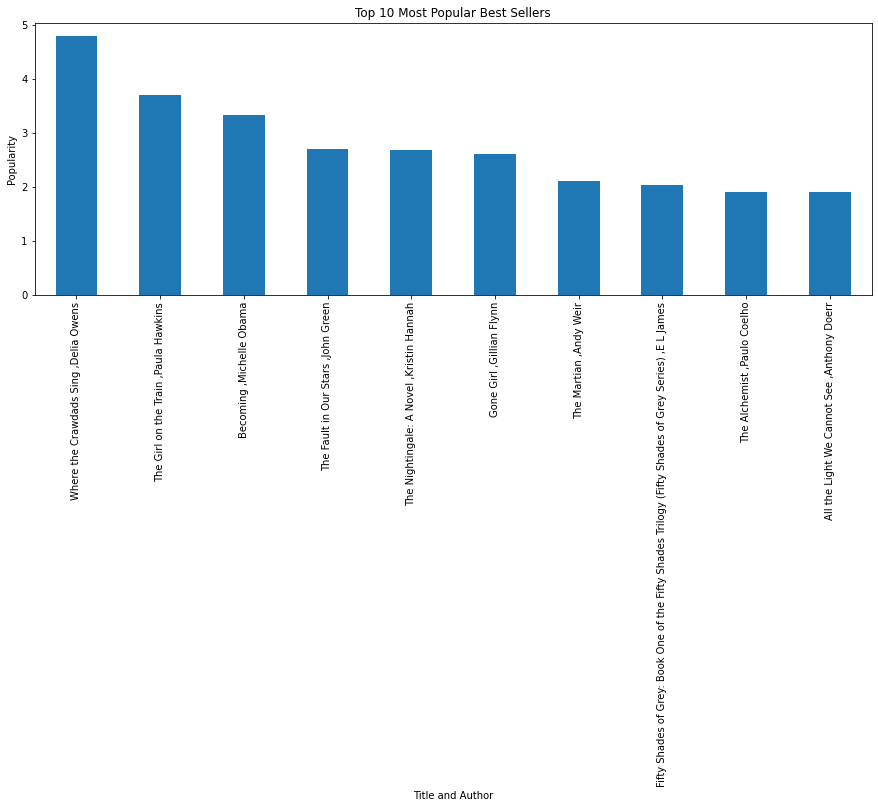

In [38]:
#Plotting Top 10 most popular books
name = list(reviews.Name)
author = list(reviews.Author)

#create labels that include title and author of best seller
label = [x +' ,'+ y for x,y in zip(name,author)]
label = label[:10]

fig = reviews.Popularity.head(10).plot(kind = 'bar', figsize = (15,5))
fig.set_xticklabels(label)
plt.title('Top 10 Most Popular Best Sellers')
plt.ylabel('Popularity')
plt.xlabel('Title and Author')